In [2]:
# Projeto integrado da Pós-graduação Lato Sensu em Inteligência Artificial e Aprendizado de Máquina | Junho de 2023
# Aluno: Matheus Bonetto Balbino

In [3]:
#Importando as bibliotecas

#Bibliotecas de manipulação do python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
import tensorflow as tf
import math

#Biblioteca do Keras para construção da rede neural
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU
from keras.optimizers import SGD


#Biblioteca sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Importação da biblioteca para obter os dados
import yfinance as yf

In [4]:
#Importando base de dados total
dataset = yf.download("ITUB4.SA", start='2019-01-02', end='2023-03-31', interval='1d')

#Base de treinamento
dataset_train = yf.download("ITUB4.SA", start='2019-01-02', end='2021-12-22', interval='1d')

#Base de teste
dataset_test = yf.download("ITUB4.SA", start='2021-12-23', end='2023-03-31', interval='1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Calcula os retornos logarítmicos usando o preço de fechamento 
returns = np.log(dataset['Close'] / dataset['Close'].shift(1))
volatility = returns.std() * np.sqrt(252) 
sharpe_ratio = ((returns.mean()*252) - 0.1375) / volatility #Selic 13,75%
print("Sharpe Ratio - ITAUB4: {:.2f}".format(sharpe_ratio))

Sharpe Ratio - ITAUB4: -0.67


In [6]:
#Aplicando a rede neural LSTM

In [7]:
#Obtendo a coluna Close da base de treinamento e teste
training_set = dataset_train.iloc[:, 3:4].values 
real_stock_price = dataset_test.iloc[:, 3:4].values

In [8]:
#Normalizando
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
#Criando uma estrutura de dados
X_train = []
y_train = []
for i in range(60, 737):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
#Remodelando
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
#Inicializando a rede RNN
regressorGRU = Sequential()

In [12]:
#Adiocionando a primeira camada da GRU
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

In [13]:
#Adicionando a segunda camada da GRU
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

In [14]:
#Adicionando a terceira camada da GRU
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

In [15]:
#Adicionando a quarta camada da GRU
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

In [16]:
#Adicionando a camada de saída
regressorGRU.add(Dense(units = 1))

#Compilando a RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

#Ajustando a RNN ao conjunto de treinamento
regressorGRU.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
22/22 [==============================] - 39s 228ms/step - loss: 0.0846
Epoch 2/100
22/22 [==============================] - 3s 151ms/step - loss: 0.0279
Epoch 3/100
22/22 [==============================] - 3s 148ms/step - loss: 0.0104
Epoch 4/100
22/22 [==============================] - 3s 154ms/step - loss: 0.0075
Epoch 5/100
22/22 [==============================] - 4s 165ms/step - loss: 0.0067
Epoch 6/100
22/22 [==============================] - 4s 182ms/step - loss: 0.0066
Epoch 7/100
22/22 [==============================] - 3s 154ms/step - loss: 0.0060
Epoch 8/100
22/22 [==============================] - 3s 159ms/step - loss: 0.0063
Epoch 9/100
22/22 [==============================] - 3s 159ms/step - loss: 0.0060
Epoch 10/100
22/22 [==============================] - 3s 156ms/step - loss: 0.0059
Epoch 11/100
22/22 [==============================] - 4s 163ms/step - loss: 0.0068
Epoch 12/100
22/22 [==============================] - 5s 211ms/step - loss: 0.0058
Epoch 13/100

In [17]:
#Resumo do modelo
print(regressorGRU.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)                1

In [18]:
#Realizando as previsões

In [19]:
dataset_total = dataset['Close']

In [20]:
dataset_total.head()

Date
2019-01-02    37.000000
2019-01-03    37.610001
2019-01-04    36.980000
2019-01-07    37.049999
2019-01-08    37.520000
Name: Close, dtype: float64

In [21]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [22]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [23]:
#O segundo número é o len(inputs)
for i in range(60, 377): 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

10/10 [==============================] - 6s 43ms/step


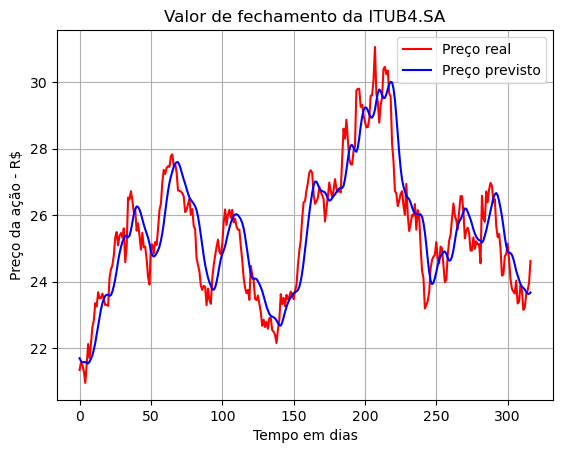

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Preço real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Preço previsto')
plt.title('Valor de fechamento da ITUB4.SA')
plt.xlabel('Tempo em dias')
plt.ylabel('Preço da ação - R$')
plt.legend()
plt.grid()
plt.show()

In [25]:
#Criando dataset único

#Criando a coluna data
dataset_test_graf = dataset_test.reset_index() #Criando um index

In [26]:
print(dataset_test_graf)

          Date       Open       High        Low      Close  Adj Close  \
0   2021-12-23  21.330000  21.570000  21.170000  21.340000  20.190018   
1   2021-12-27  21.480000  21.700001  21.309999  21.559999  20.398165   
2   2021-12-28  21.629999  21.700001  21.400000  21.480000  20.322475   
3   2021-12-29  21.530001  21.580000  21.230000  21.299999  20.152178   
4   2021-12-30  21.440001  21.440001  20.950001  20.950001  19.821041   
..         ...        ...        ...        ...        ...        ...   
312 2023-03-24  23.160000  23.420000  22.740000  23.219999  23.187634   
313 2023-03-27  23.500000  23.780001  23.379999  23.620001  23.587078   
314 2023-03-28  23.639999  23.920000  23.500000  23.730000  23.696922   
315 2023-03-29  23.750000  24.080000  23.580000  23.959999  23.926601   
316 2023-03-30  24.320000  24.799999  24.219999  24.620001  24.585686   

       Volume  
0    22377000  
1    14025800  
2    15294200  
3    12856100  
4    39997300  
..        ...  
312  300188

In [27]:
real_stock_price_date = dataset_test_graf['Date'] #Criando um dataset com a coluna Date

In [28]:
print(real_stock_price_date)

0     2021-12-23
1     2021-12-27
2     2021-12-28
3     2021-12-29
4     2021-12-30
         ...    
312   2023-03-24
313   2023-03-27
314   2023-03-28
315   2023-03-29
316   2023-03-30
Name: Date, Length: 317, dtype: datetime64[ns]


In [29]:
real_stock_price_date = pd.DataFrame(real_stock_price_date, columns = ['Date']) #Incluindo a linha com o nome Date

In [30]:
real_stock_price_date.head()

,Date
0,2021-12-23
1,2021-12-27
2,2021-12-28
3,2021-12-29
4,2021-12-30


In [31]:
real_stock_price_close = dataset_test_graf['Close'] #Criando um dataset close real

In [32]:
print(real_stock_price_close)

0      21.340000
1      21.559999
2      21.480000
3      21.299999
4      20.950001
         ...    
312    23.219999
313    23.620001
314    23.730000
315    23.959999
316    24.620001
Name: Close, Length: 317, dtype: float64


In [33]:
real_stock_price_close_gra = pd.DataFrame(real_stock_price_close, columns = ['Close']) #Criando um dataset real

In [34]:
real_stock_price_close_gra.head()

,Close
0,21.340000
1,21.559999
2,21.480000
3,21.299999
4,20.950001


In [35]:
predicted_stock_price_gra = pd.DataFrame(predicted_stock_price, columns = ['Predicted']) #Criando um dataset predicted

In [36]:
predicted_stock_price_gra.head()

,Predicted
0,21.693430
1,21.604460
2,21.569569
3,21.572662
4,21.580585


In [37]:
dataset_predicted=pd.concat([real_stock_price_date, real_stock_price_close_gra, predicted_stock_price_gra],axis=1,join='inner')

In [38]:
dataset_predicted.head()

,Date,Close,Predicted
0,2021-12-23,21.340000,21.693430
1,2021-12-27,21.559999,21.604460
2,2021-12-28,21.480000,21.569569
3,2021-12-29,21.299999,21.572662
4,2021-12-30,20.950001,21.580585


In [39]:
dataset_predicted = dataset_predicted.set_index('Date')

In [40]:
dataset_predicted.tail(5)

,Close,Predicted
Date,,
2023-03-24,23.219999,23.760328
2023-03-27,23.620001,23.687426
2023-03-28,23.730000,23.635719
2023-03-29,23.959999,23.627295
2023-03-30,24.620001,23.671059


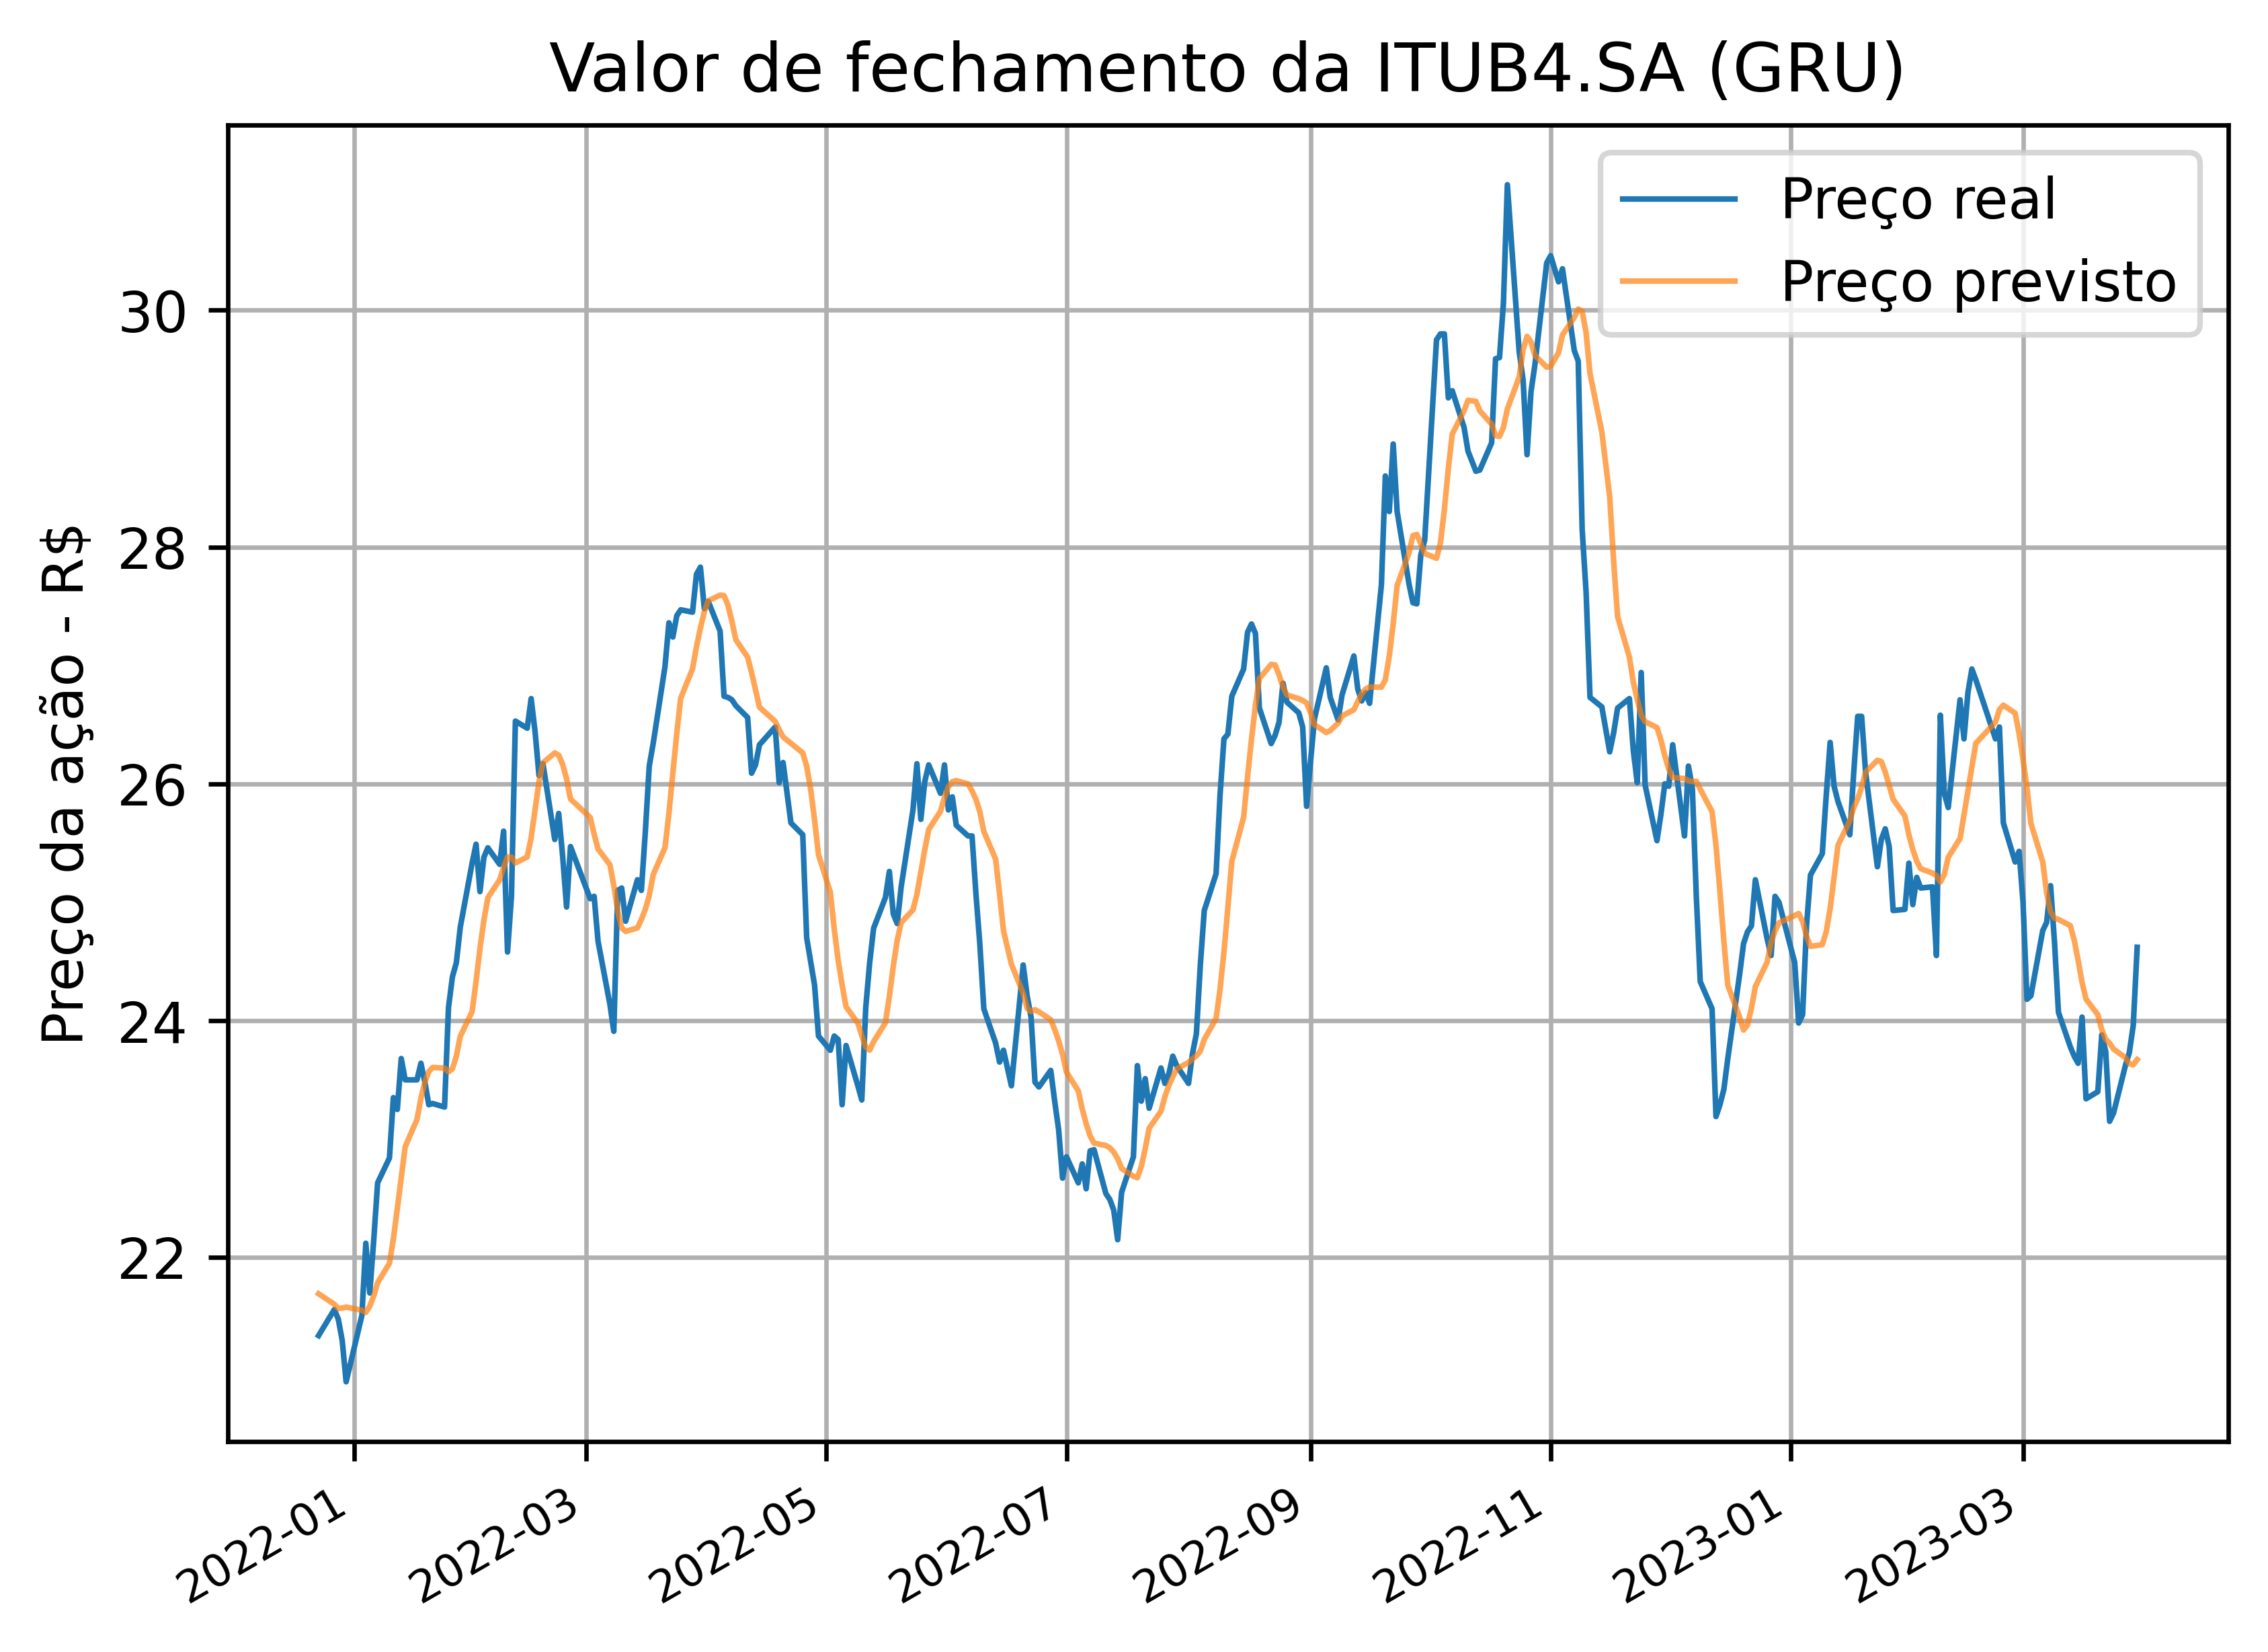

In [41]:
#Gráfico com as previsões
fig, ax = plt.subplots(dpi=600)
date_format = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

ax.plot(dataset_predicted['Close'], lw=1, label = 'Preço real')
ax.plot(dataset_predicted['Predicted'], lw=1, alpha=0.7, label='Preço previsto')

ax.set_ylabel('Preço da ação - R$')
ax.set_title('Valor de fechamento da ITUB4.SA (GRU)')
ax.grid() 
ax.legend()

plt.show()

In [42]:
#Métricas de avaliação

#Erro Médio Absoluto - MAE
MAE = mean_absolute_error(real_stock_price_close_gra, predicted_stock_price_gra)

In [43]:
#Erro Quadrático Médio - MSE
MSE = mean_squared_error(real_stock_price_close_gra, predicted_stock_price_gra, squared = True)

In [44]:
#Raiz quadrada do erro médio - RMSE
RMSE = mean_squared_error(real_stock_price_close_gra, predicted_stock_price_gra, squared = False)

In [45]:
#Média Percentual Absoluta do Erro - MAPE
MAPE = mean_absolute_percentage_error(real_stock_price_close_gra, predicted_stock_price_gra)

In [46]:
#Erro relativo
dataset_predicted['Error %'] = dataset_predicted.apply(lambda x: 100*(abs(x['Close']-x['Predicted'])/x['Close']), axis=1)

In [47]:
dataset_predicted.head()

,Close,Predicted,Error %
Date,,,
2021-12-23,21.340000,21.693430,1.656185
2021-12-27,21.559999,21.604460,0.206217
2021-12-28,21.480000,21.569569,0.416988
2021-12-29,21.299999,21.572662,1.280109
2021-12-30,20.950001,21.580585,3.009951


In [48]:
Max = max(dataset_predicted['Error %'])

In [49]:
Min = min(dataset_predicted['Error %'])

In [50]:
print('Métricas de avaliação GRU - ITUB4:')
print("MAE: {:.3f}".format(MAE))
print("MAPE: {:.3f}%".format(MAPE*100))
print("RMSE: {:.3f}".format(RMSE))
print("MSE: {:.3f}".format(MSE))
print('Máximo erro relativo = {:.3f}%'.format(Max))
print('Mínimo erro relativo = {:.3f}%'.format(Min))

Métricas de avaliação GRU - ITUB4:
MAE: 0.659
MAPE: 2.586%
RMSE: 0.823
MSE: 0.678
Máximo erro relativo = 10.227%
Mínimo erro relativo = 0.003%


In [51]:
print('GRU - ITUB4')
dataset_predicted.describe()

GRU - ITUB4


,Close,Predicted,Error %
count,317.000000,317.000000,317.000000
mean,25.473218,25.517530,2.586051
std,1.922707,1.851991,1.914555
min,20.950001,21.535967,0.002879
25%,23.959999,24.105108,1.049853
50%,25.410000,25.449507,2.245703
75%,26.580000,26.581610,3.719830
max,31.059999,30.009647,10.227299


In [52]:
# Calcula os retornos logarítmicos usando o preço de fechamento 
returns = np.log(dataset_predicted['Close'] / dataset_predicted['Close'].shift(1))
volatility = returns.std() * np.sqrt(252) 
sharpe_ratio = ((returns.mean()*252) - 0.1375) / volatility #Selic 13,75%
print("Sharpe Ratio - ITUB4: {:.2f}".format(sharpe_ratio))

Sharpe Ratio - ITUB4: -0.09


In [53]:
# Calcula os retornos logarítmicos usando o preço de fechamento 
returns = np.log(dataset_predicted['Predicted'] / dataset_predicted['Predicted'].shift(1))
volatility = returns.std() * np.sqrt(252) 
sharpe_ratio = ((returns.mean()*252) - 0.1375) / volatility #Selic 13,75%
print("Sharpe Ratio - ITUB4: {:.2f}".format(sharpe_ratio))

Sharpe Ratio - ITUB4: -0.64
